In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#import pysal as ps # Wczytanie danych z pliku dbf

## Klasyfikacja

Klasyfikacja zalicza się do metod uczenia nadzorowanego (ang. supervised learning). Zbiór (macierz) danych w tym przypadku składa się z obiektów charakteryzujących się atrybutami opisującymi i atrybutem decyzyjnym. Przyjmuje się przy tym, że pomiędzy atrybutami opisującymi, a atrybutem decyzyjnym zachodzi pewien związek przyczynowo-skutkowy zaś kategoryczny atrybut decyzyjny określa klasę do której przynależy obiekt. Zbiór danych jest traktowany jako źródło wiedzy na podstawie którego określa się rodzaj klasyfikatora, a następnie dobiera jego parametry w tzw. procesie uczenia. Gotowy klasyfikator może następnie zostać wykorzystany do określenia przynależności obiektu dla którego znane są jedynie wartości atrybutów opisujących do właściwej klasy. 

Z reguły w celu sprawdzenia poprawności danego algorytmu i sprawdzenia jego skuteczności dla danego zadania klasyfikacji podział zbioru danych wykonywany jest na zbiór uczący i testowy (najczęściej w proporcjach 80/20 lub 70/30). Czasem jednak w przypadku testowania algorytmów i ich dostrajania stosuje się podział 60/20/20, a poszczególne części stanową zbiory odpowiednio: treningowy, walidacyjny i testowy. 

W tym notatniku skupimy się na klasyfikacji metodą **SVM**.


Wygenerujemy teraz nowy zbiór z klastrami bardziej się nakładającymi

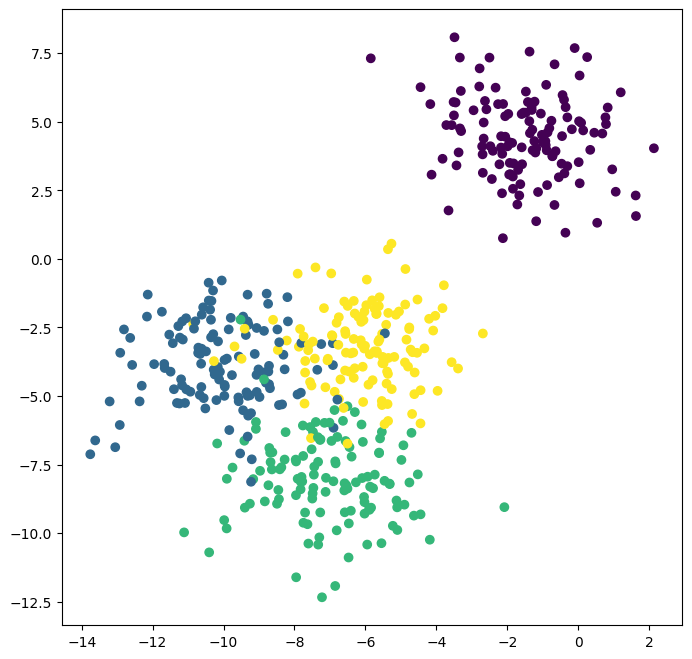

In [2]:
from sklearn.datasets import make_blobs
X3, y3 = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1.5,
                  center_box=(-10.0, 10.0),
                  shuffle=True,    # przetasowanie kolejności próbek
                  random_state=1)  # ustawienie momentu startu zmiennej pseudolosowej w celu zapewnienia powtarzalności wyników
columns = ['feature' + str(x) for x in np.arange(1, X3.shape[1]+1, 1)]
d = {key: values for key, values in zip(columns, X3.T)}
d['label'] = y3
dane3 = pd.DataFrame(d).reindex(columns=columns+['label'])

#Wyświelenie blobów
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(dane3.feature1, dane3.feature2, marker='o', c=dane3.label)

Miara $f_1 = 2*\frac{precyzja * czułość}{precyzja+czułość}$. 

Precyzja jest miarą wskazującą z jaką pewnością możemy ufać przewidywaniom pozytywnym: $precyzja = \frac{TP}{TP+FP}$  

Czułość jest miarą wskazującą w jakim procencie klasa faktycznie pozytywna została pokryta przewidywaniem pozytywnym: $czułość = \frac{TP}{TP+FN}$ 


### SVM
Metoda wektorów nośnych/SVM z ang. Support Vector Machine jest algorytmem, którego zadaniem jest podzielenie przestrzeni cech przy pomocy wektorów nośnych. W przypadku 2 cech, które można zobrazować na wykresie płaskim, są to po proste (w przypadku jądra liniowego) lub wielomiany lub funkcja Gaussa (w przypadku jąder radialnych). Jądra liniowe są szybkie i proste w użyciu, jednakże nadają się do klasyfikacji obszarów wyraźnie od siebie odstających. W celu dokładnego wyodrębnienia obszarów należy użyć jąder radialnych, uważając na przeuczenie klasyfikatora.   

,feature1,feature2,label
0,-10.785289,1.728062,1
1,-6.342566,9.911338,0
2,-14.431693,-3.683509,1
3,10.389289,-6.023495,0
4,-4.118290,-5.106990,1
...,...,...,...
495,-13.098551,-3.460073,1
496,-3.288403,-10.189205,1
497,-10.095709,-7.254112,1
498,-6.396800,8.117403,0


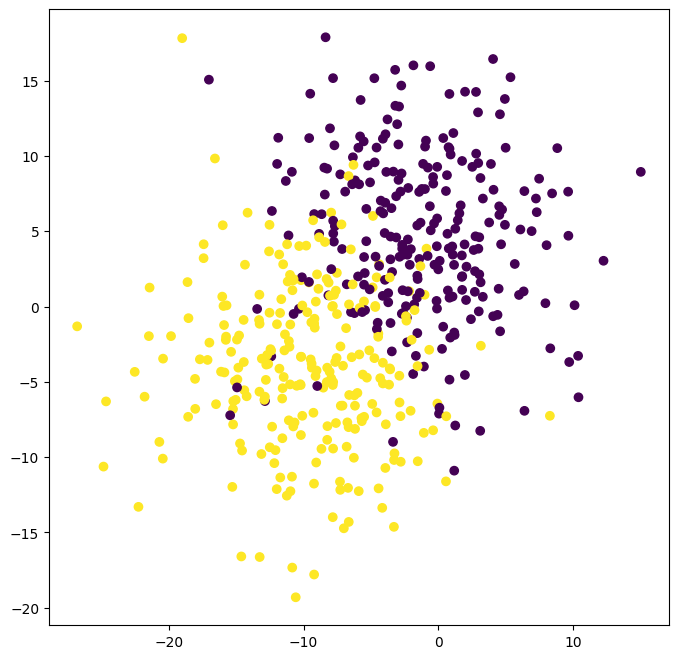

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
X3, y3 = make_blobs(n_samples=500,
                  n_features=2,
                  centers=2,
                  cluster_std=5.5,
                  center_box=(-10.0, 10.0),
                  shuffle=True,    # przetasowanie kolejności próbek
                  random_state=1)  # ustawienie momentu startu zmiennej pseudolosowej w celu zapewnienia powtarzalności wyników
columns = ['feature' + str(x) for x in np.arange(1, X3.shape[1]+1, 1)]
d = {key: values for key, values in zip(columns, X3.T)}
d['label'] = y3
dane3 = pd.DataFrame(d).reindex(columns=columns+['label'])

#Wyświelenie blobów
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(dane3.feature1, dane3.feature2, marker='o', c=dane3.label)

dane3

c:\Users\pawel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\pawel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
c:\Users\pawel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\pawel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


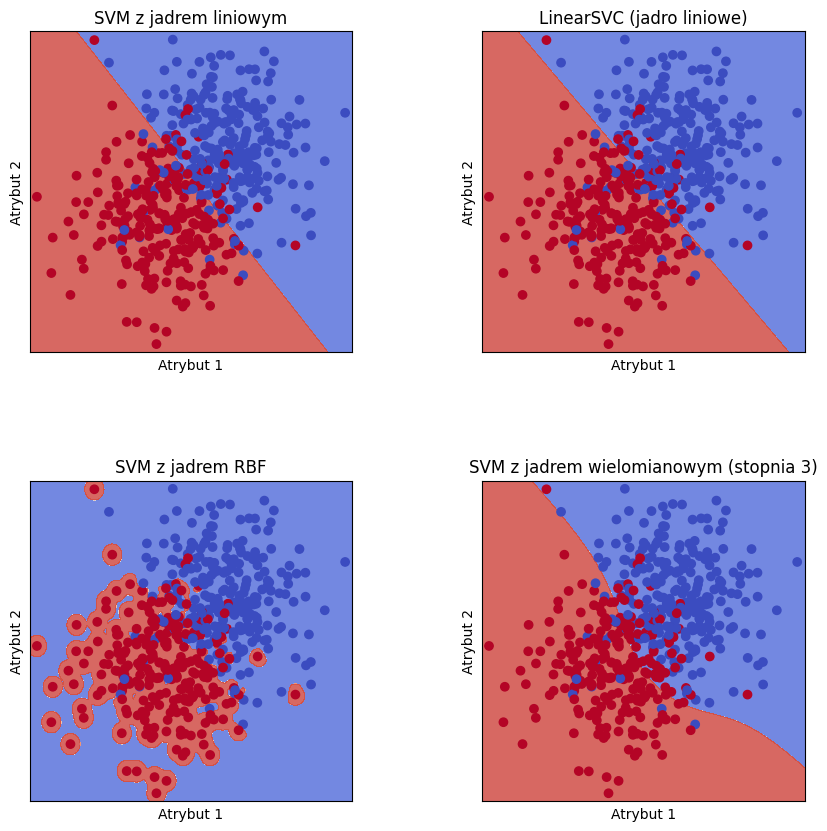

In [4]:
from sklearn import svm
h = .02  # step size in the mesh
cechy = columns
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(dane3[cechy], dane3['label'])
rbf_svc = svm.SVC(kernel='rbf', gamma=2).fit(dane3[cechy], dane3['label'])
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(dane3[cechy], dane3['label'])
lin_svc = svm.LinearSVC(C=C).fit(dane3[cechy], dane3['label'])

# create a mesh to plot in
x_min, x_max = dane3.iloc[:, 0].min() - 1, dane3.iloc[:, 0].max() + 1
y_min, y_max = dane3.iloc[:, 1].min() - 1, dane3.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVM z jadrem liniowym',
          'LinearSVC (jadro liniowe)',
          'SVM z jadrem RBF',
          'SVM z jadrem wielomianowym (stopnia 3)']

plt.figure(figsize=(10,10))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm)
    plt.xlabel('Atrybut 1')
    plt.ylabel('Atrybut 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

## Liniowe SVM

W pakiecie sklearn dostępne są dwa linowe modele svm.SVC i svm.LinearSVC.

### Zadanie 1

Dla klasyfikatorów liniowego svm.SVC przeprowadź testy doboru współczynnika regularyzacji C dla wartości [0.01, 0.1, 1, 10, 100, 1000]. Pokaż granice decyzyjne oraz wykreśl krzywe ROC. Na podstawie otrzymanych wyników określ najlepszą wartość współczynnika C.

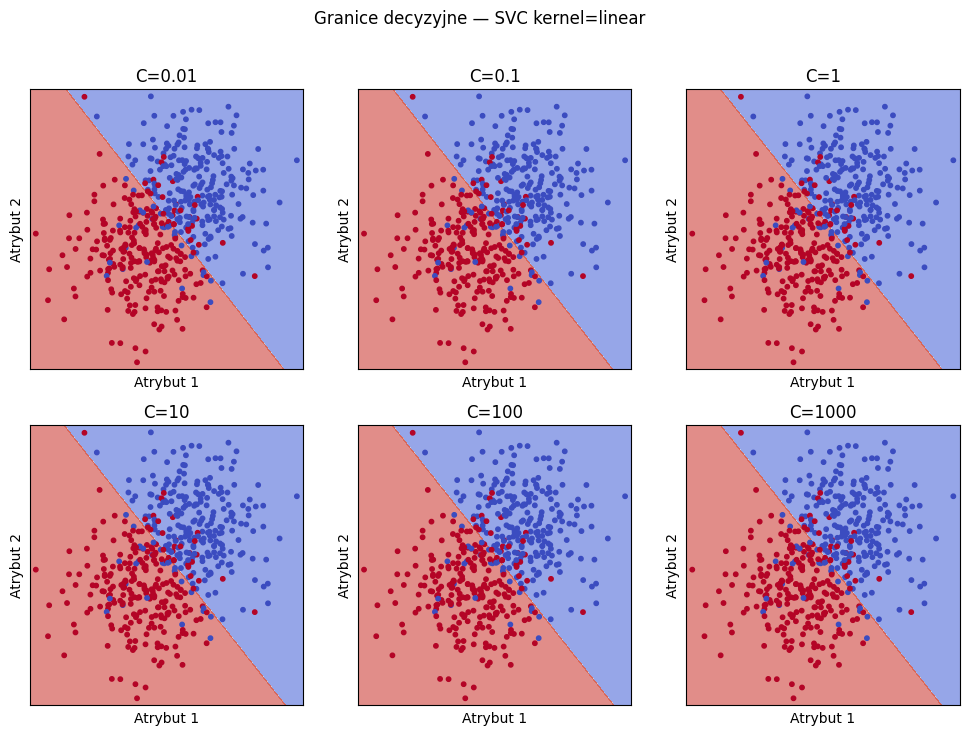

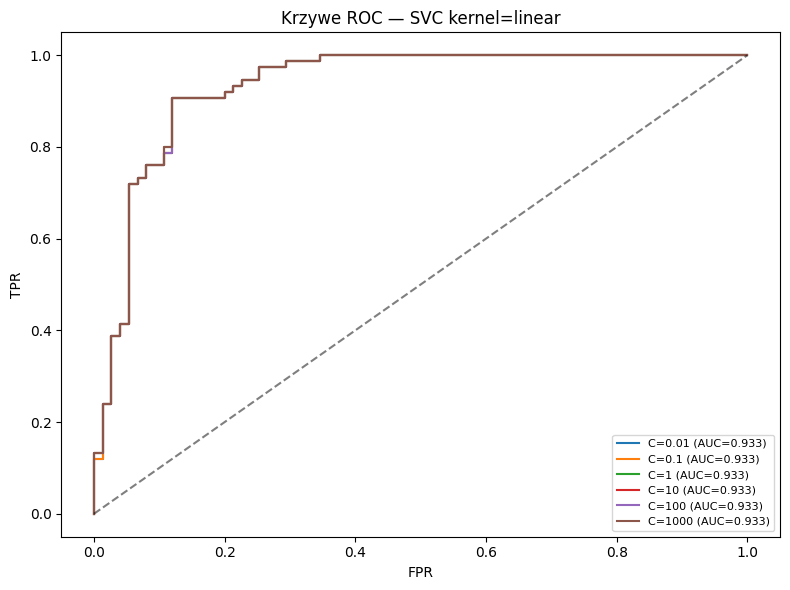

Wyniki (posortowane po AUC):
         C       AUC        F1
5  1000.00  0.933333  0.857143
0     0.01  0.933156  0.857143
1     0.10  0.933156  0.857143
2     1.00  0.933156  0.857143
3    10.00  0.933156  0.857143
4   100.00  0.933156  0.857143
Najlepsza wartość C (wg AUC): 1000.0


In [5]:
# Zadanie 1 — SVM.SVC (liniowe jądro): dobór C i ROC
from sklearn import svm
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dane
X = dane3[columns].values
y = dane3['label'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Cs = [0.01, 0.1, 1, 10, 100, 1000]
metrics = []

# Siatka do granic decyzyjnych
h = 0.05
x_min, x_max = dane3.iloc[:, 0].min() - 1, dane3.iloc[:, 0].max() + 1
y_min, y_max = dane3.iloc[:, 1].min() - 1, dane3.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Granice decyzyjne — SVC kernel=linear', y=0.98)

plt_roc = plt.figure(figsize=(8, 6))
axroc = plt_roc.add_subplot(111)

for idx, C in enumerate(Cs):
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)

    # Granice decyzyjne
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax = axes[idx // 3][idx % 3]
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    ax.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm, s=10)
    ax.set_title(f'C={C}')
    ax.set_xlabel('Atrybut 1')
    ax.set_ylabel('Atrybut 2')
    ax.set_xticks([])
    ax.set_yticks([])

    # ROC i miary
    scores = clf.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, scores)
    auc_val = auc(fpr, tpr)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    metrics.append({'C': C, 'AUC': auc_val, 'F1': f1})
    axroc.plot(fpr, tpr, label=f'C={C} (AUC={auc_val:.3f})')

axroc.plot([0, 1], [0, 1], 'k--', alpha=0.5)
axroc.set_title('Krzywe ROC — SVC kernel=linear')
axroc.set_xlabel('FPR')
axroc.set_ylabel('TPR')
axroc.legend(loc='lower right', fontsize=8)
plt.tight_layout()
plt.show()

# Wyniki i najlepsze C
res = pd.DataFrame(metrics).sort_values('AUC', ascending=False)
print('Wyniki (posortowane po AUC):')
print(res)
best_C = res.iloc[0]['C']
print(f'Najlepsza wartość C (wg AUC): {best_C}')

### Zadanie 2

Dla klasyfikatorów liniowego svm.LinearSVC przeprowadź testy doboru współczynnika regularyzacji C dla wartości [0.01, 0.1, 1, 10, 100, 1000]. Pokaż granice decyzyjne oraz wykreśl krzywe ROC. Na podstawie otrzymanych wyników określ najlepszą wartość współczynnika C.

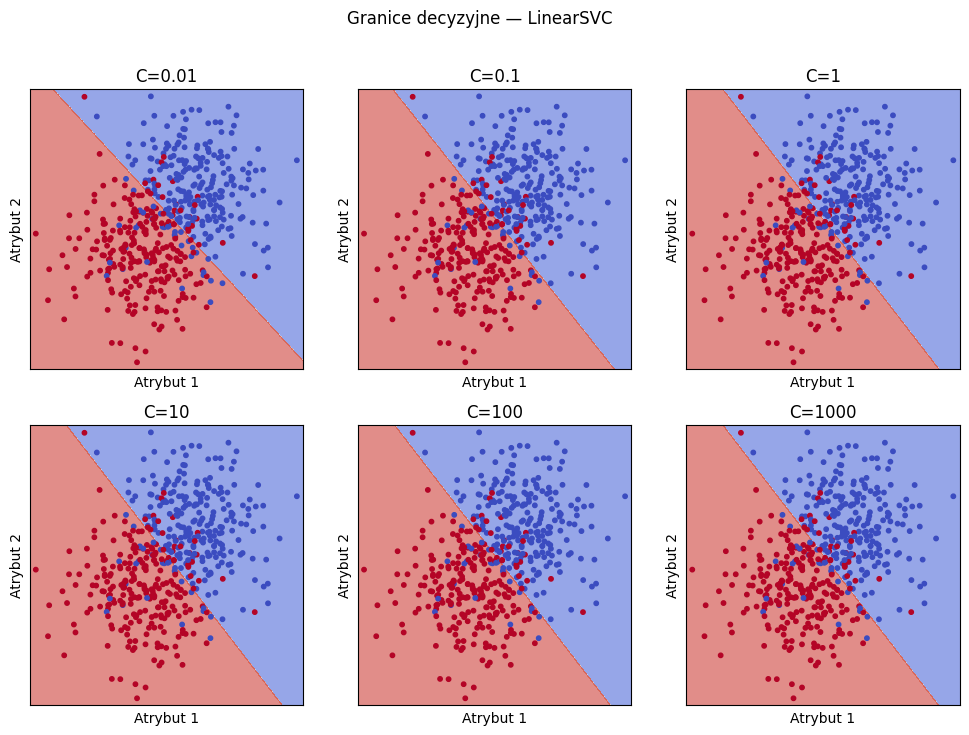

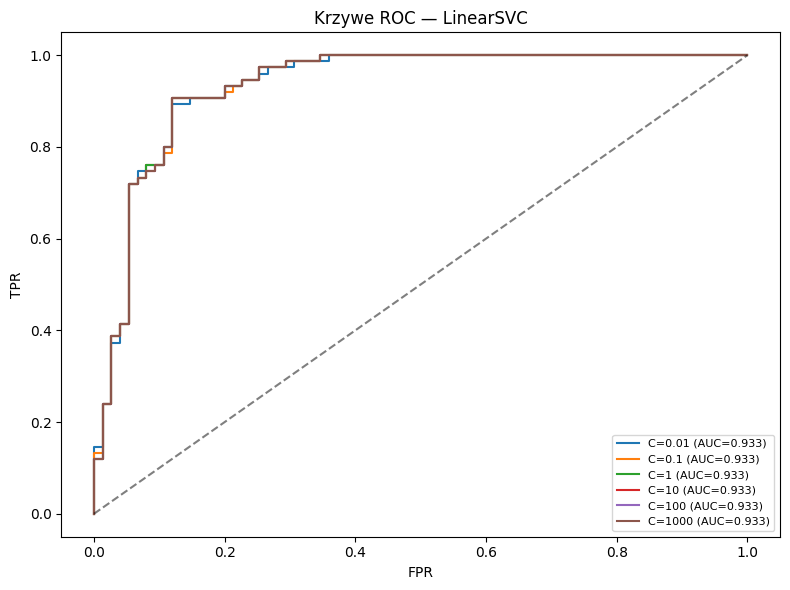

Wyniki (posortowane po AUC):
         C       AUC        F1
2     1.00  0.933333  0.857143
1     0.10  0.933156  0.864865
4   100.00  0.933156  0.857143
3    10.00  0.933156  0.857143
5  1000.00  0.933156  0.857143
0     0.01  0.932800  0.880000
Najlepsza wartość C (wg AUC): 1.0


In [6]:
# Zadanie 2 — LinearSVC: dobór C i ROC
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dane
X = dane3[columns].values
y = dane3['label'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Cs = [0.01, 0.1, 1, 10, 100, 1000]
metrics = []

# Siatka do granic decyzyjnych
h = 0.05
x_min, x_max = dane3.iloc[:, 0].min() - 1, dane3.iloc[:, 0].max() + 1
y_min, y_max = dane3.iloc[:, 1].min() - 1, dane3.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Granice decyzyjne — LinearSVC', y=0.98)

plt_roc = plt.figure(figsize=(8, 6))
axroc = plt_roc.add_subplot(111)

for idx, C in enumerate(Cs):
    clf = LinearSVC(C=C)
    clf.fit(X_train, y_train)

    # Granice decyzyjne
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax = axes[idx // 3][idx % 3]
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    ax.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm, s=10)
    ax.set_title(f'C={C}')
    ax.set_xlabel('Atrybut 1')
    ax.set_ylabel('Atrybut 2')
    ax.set_xticks([])
    ax.set_yticks([])

    # ROC i miary (LinearSVC: decision_function)
    scores = clf.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, scores)
    auc_val = auc(fpr, tpr)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    metrics.append({'C': C, 'AUC': auc_val, 'F1': f1})
    axroc.plot(fpr, tpr, label=f'C={C} (AUC={auc_val:.3f})')

axroc.plot([0, 1], [0, 1], 'k--', alpha=0.5)
axroc.set_title('Krzywe ROC — LinearSVC')
axroc.set_xlabel('FPR')
axroc.set_ylabel('TPR')
axroc.legend(loc='lower right', fontsize=8)
plt.tight_layout()
plt.show()

# Wyniki i najlepsze C
res = pd.DataFrame(metrics).sort_values('AUC', ascending=False)
print('Wyniki (posortowane po AUC):')
print(res)
best_C = res.iloc[0]['C']
print(f'Najlepsza wartość C (wg AUC): {best_C}')

### Zadanie 3

Dla klasyfikatorów SVM z jądrem wielomianowym dokonaj doboru stopnia wielomianu i współczynnika regularyzacji C. Pokaż granice decyzyjne oraz wykreśl krzywe ROC. 

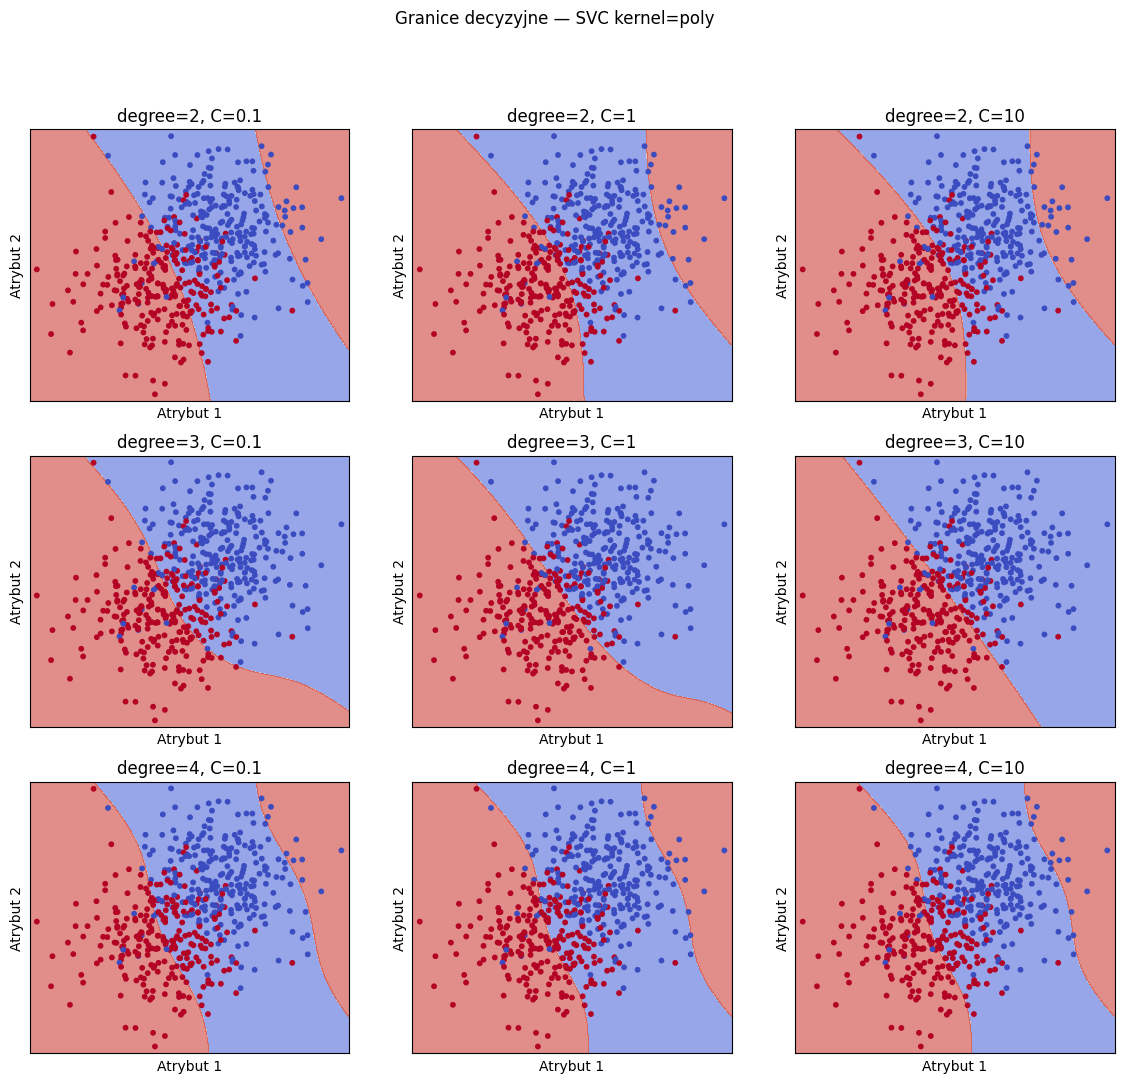

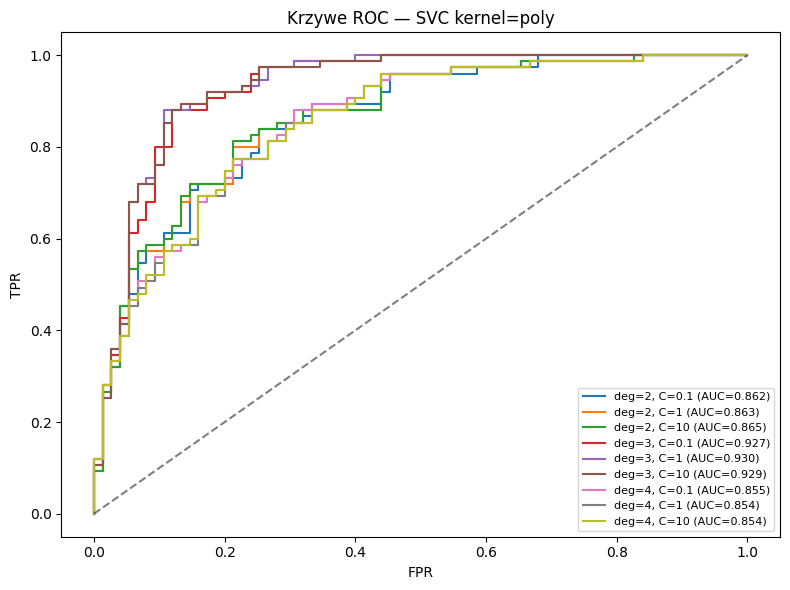

Wyniki (posortowane po AUC):
   degree     C       AUC        F1
4       3   1.0  0.930311  0.802920
5       3  10.0  0.929422  0.794118
3       3   0.1  0.926933  0.744186
2       2  10.0  0.864533  0.753623
1       2   1.0  0.863289  0.744526
0       2   0.1  0.861511  0.696970
6       4   0.1  0.854756  0.596491
7       4   1.0  0.853511  0.633333
8       4  10.0  0.853511  0.644628
Najlepsze parametry (wg AUC): degree=3.0, C=1.0


In [7]:
# Zadanie 3 — SVC z jądrem wielomianowym: dobór stopnia i C
from sklearn import svm
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dane
X = dane3[columns].values
y = dane3['label'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

degrees = [2, 3, 4]
Cs = [0.1, 1, 10]
metrics = []

# Siatka do granic decyzyjnych
h = 0.05
x_min, x_max = dane3.iloc[:, 0].min() - 1, dane3.iloc[:, 0].max() + 1
y_min, y_max = dane3.iloc[:, 1].min() - 1, dane3.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig, axes = plt.subplots(3, 3, figsize=(14, 12))
fig.suptitle('Granice decyzyjne — SVC kernel=poly', y=0.98)

plt_roc = plt.figure(figsize=(8, 6))
axroc = plt_roc.add_subplot(111)

for i, deg in enumerate(degrees):
    for j, C in enumerate(Cs):
        clf = svm.SVC(kernel='poly', degree=deg, C=C)
        clf.fit(X_train, y_train)

        # Granice decyzyjne
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        ax = axes[i][j]
        ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
        ax.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm, s=10)
        ax.set_title(f'degree={deg}, C={C}')
        ax.set_xlabel('Atrybut 1')
        ax.set_ylabel('Atrybut 2')
        ax.set_xticks([])
        ax.set_yticks([])

        # ROC i miary
        scores = clf.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, scores)
        auc_val = auc(fpr, tpr)
        y_pred = clf.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        metrics.append({'degree': deg, 'C': C, 'AUC': auc_val, 'F1': f1})
        axroc.plot(fpr, tpr, label=f'deg={deg}, C={C} (AUC={auc_val:.3f})')

axroc.plot([0, 1], [0, 1], 'k--', alpha=0.5)
axroc.set_title('Krzywe ROC — SVC kernel=poly')
axroc.set_xlabel('FPR')
axroc.set_ylabel('TPR')
axroc.legend(loc='lower right', fontsize=8)
plt.tight_layout()
plt.show()

# Wyniki i najlepsze parametry
res = pd.DataFrame(metrics).sort_values('AUC', ascending=False)
print('Wyniki (posortowane po AUC):')
print(res)
best_deg = res.iloc[0]['degree']
best_C = res.iloc[0]['C']
print(f'Najlepsze parametry (wg AUC): degree={best_deg}, C={best_C}')

### Zadanie 4

Dla klasyfikatorów SVM z jądrem Gaussa dokonaj doboru współczynnika wariancji. Pokaż granice decyzyjne dla kilku wybranych współczynników oraz wykreśl krzywe ROC. 

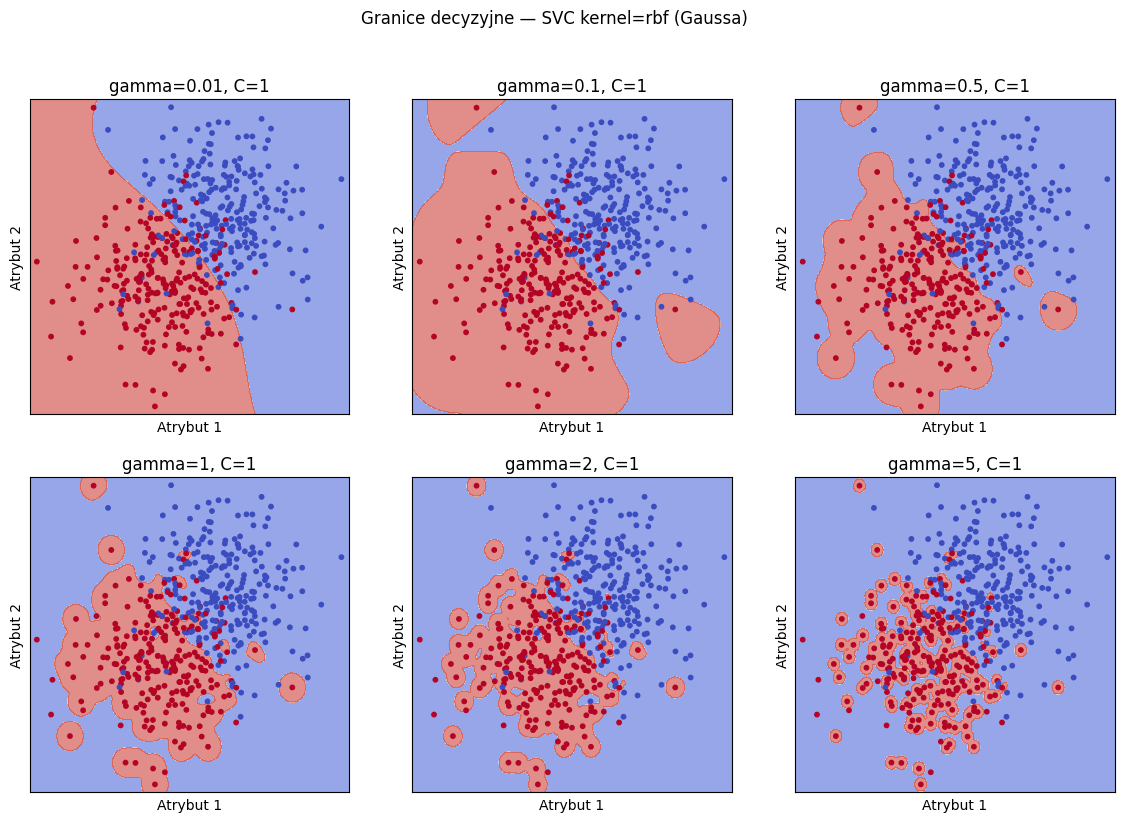

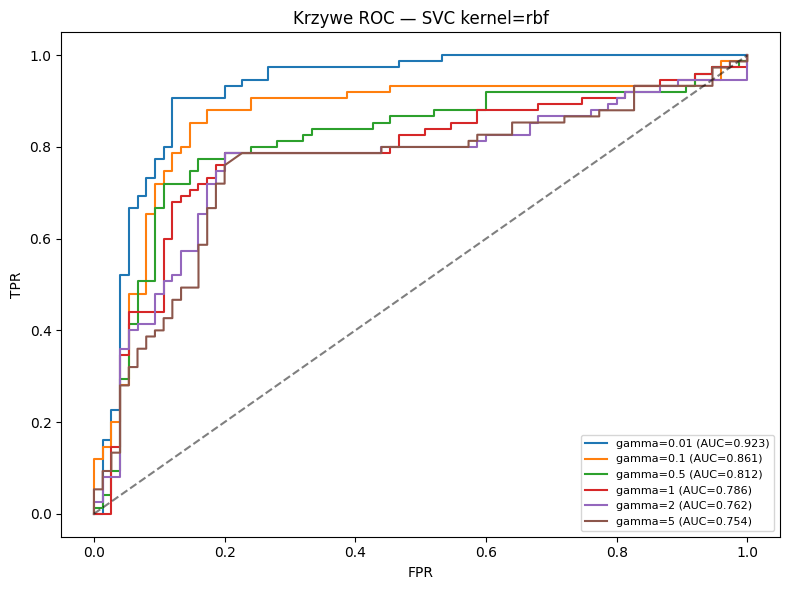

Wyniki (posortowane po AUC):
   gamma  C       AUC        F1
0   0.01  1  0.923378  0.864865
1   0.10  1  0.860800  0.825175
2   0.50  1  0.812089  0.771429
3   1.00  1  0.785778  0.765957
4   2.00  1  0.762489  0.742857
5   5.00  1  0.754133  0.629921
Najlepszy gamma (wg AUC): 0.01 przy C=1


In [8]:
# Zadanie 4 — SVC z jądrem RBF (Gaussa): dobór gamma i ROC
from sklearn import svm
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dane
X = dane3[columns].values
y = dane3['label'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

gammas = [0.01, 0.1, 0.5, 1, 2, 5]
C_fixed = 1
metrics = []

# Siatka do granic decyzyjnych
h = 0.05
x_min, x_max = dane3.iloc[:, 0].min() - 1, dane3.iloc[:, 0].max() + 1
y_min, y_max = dane3.iloc[:, 1].min() - 1, dane3.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig, axes = plt.subplots(2, 3, figsize=(14, 9))
fig.suptitle('Granice decyzyjne — SVC kernel=rbf (Gaussa)', y=0.98)

plt_roc = plt.figure(figsize=(8, 6))
axroc = plt_roc.add_subplot(111)

for idx, gamma in enumerate(gammas):
    clf = svm.SVC(kernel='rbf', gamma=gamma, C=C_fixed)
    clf.fit(X_train, y_train)

    # Granice decyzyjne
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax = axes[idx // 3][idx % 3]
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    ax.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm, s=10)
    ax.set_title(f'gamma={gamma}, C={C_fixed}')
    ax.set_xlabel('Atrybut 1')
    ax.set_ylabel('Atrybut 2')
    ax.set_xticks([])
    ax.set_yticks([])

    # ROC i miary
    scores = clf.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, scores)
    auc_val = auc(fpr, tpr)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    metrics.append({'gamma': gamma, 'C': C_fixed, 'AUC': auc_val, 'F1': f1})
    axroc.plot(fpr, tpr, label=f'gamma={gamma} (AUC={auc_val:.3f})')

axroc.plot([0, 1], [0, 1], 'k--', alpha=0.5)
axroc.set_title('Krzywe ROC — SVC kernel=rbf')
axroc.set_xlabel('FPR')
axroc.set_ylabel('TPR')
axroc.legend(loc='lower right', fontsize=8)
plt.tight_layout()
plt.show()

# Wyniki i najlepsze parametry
res = pd.DataFrame(metrics).sort_values('AUC', ascending=False)
print('Wyniki (posortowane po AUC):')
print(res)
best_gamma = res.iloc[0]['gamma']
print(f'Najlepszy gamma (wg AUC): {best_gamma} przy C={C_fixed}')

In [ ]:
c